In [ ]:
#Ref
#https://www.kaggle.com/code/surajjha101/regression-models-diamond-price-prediction

In [47]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

# 硬train一發

In [48]:
cd C:\Users\user\Desktop\2024絕緣體初賽\202406初賽\training

C:\Users\user\Desktop\2024絕緣體初賽\202406初賽\training


In [17]:
data_df = pd.read_csv(r"C:\Users\user\Desktop\2024絕緣體初賽\202406初賽\training\1\a.csv")
data_df.head()

,id,y01,y02,y03,y04,y05,y06,y07,y08,y09,y10
0,1,1072,1015,1024,1116,1196,1194,1190,1196,1214,1181
1,2,1072,1015,1024,1115,1194,1193,1189,1194,1212,1180
2,3,1070,1015,1023,1113,1190,1189,1185,1192,1209,1177
3,4,1067,1014,1021,1111,1187,1186,1182,1188,1205,1174
4,5,1065,1012,1020,1108,1184,1183,1179,1185,1202,1170


In [3]:
# 1234.csv
import pandas as pd
import os

# 資料夾路徑
folder_path = r'C:\Users\user\Desktop\2024絕緣體初賽\202406初賽\training'

# 創建一個空的DataFrame來存儲所有資料
combined_df = pd.DataFrame()

# 讀取資料夾中的所有檔案
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # 確保只讀取csv檔案
        file_path = os.path.join(folder_path, filename)
        # 讀取csv檔案
        df = pd.read_csv(file_path)
        # 移除'id'欄位
        df.drop(columns='id', inplace=True, errors='ignore')
        # 將其添加到combined_df中
        combined_df = pd.concat([combined_df, df], axis=1)

# 印出combined_df的前幾行來確認資料是否正確整合
print(combined_df.head())


    y01   y02   y03   y04   y05   y06   y07   y08   y09   y10  ...     y01  \
0  2260  1906  2188  1652  2141  2091  2598  1784  2078  1583  ...  1379.0   
1  2235  1888  2164  1636  2118  2070  2570  1767  2056  1568  ...  1368.0   
2  2211  1867  2141  1619  2095  2047  2541  1748  2034  1552  ...  1357.0   
3  2187  1847  2117  1602  2072  2026  2512  1730  2011  1537  ...  1345.0   
4  2162  1828  2094  1585  2049  2004  2484  1712  1989  1521  ...  1333.0   

      y02     y03     y04     y05     y06    y07     y08     y09     y10  
0  1708.0  1961.0  1069.0  1772.0  1869.0  807.0  1376.0  1085.0  1853.0  
1  1693.0  1942.0  1063.0  1757.0  1851.0  804.0  1366.0  1078.0  1837.0  
2  1678.0  1922.0  1056.0  1740.0  1833.0  800.0  1354.0  1069.0  1818.0  
3  1662.0  1903.0  1048.0  1723.0  1814.0  795.0  1342.0  1060.0  1800.0  
4  1646.0  1884.0  1041.0  1706.0  1796.0  791.0  1331.0  1052.0  1783.0  

[5 rows x 340 columns]


In [49]:
# 1234 folder abcd.csv
import pandas as pd
import os

# 資料夾路徑
folder_path = r'C:\Users\user\Desktop\2024絕緣體初賽\202406初賽\training'

# 創建一個空的DataFrame來存儲所有資料
combined_df = pd.DataFrame()

# 讀取資料夾中的所有檔案
for i in range(1,14):
    fold = os.path.join(folder_path, str(i))
    for filename in os.listdir(fold):
        if filename.endswith('.csv'):  # 確保只讀取csv檔案
            file_path = os.path.join(fold, filename)
            # 讀取csv檔案
            df = pd.read_csv(file_path)
            # 移除'id'欄位
            df.drop(columns='id', inplace=True, errors='ignore')
            # 將其添加到combined_df中
            combined_df = pd.concat([combined_df, df], axis=1)

# 印出combined_df的前幾行來確認資料是否正確整合
print(combined_df.head())

    y01   y02   y03   y04   y05   y06   y07   y08   y09   y10  ...   y01  \
0  1072  1015  1024  1116  1196  1194  1190  1196  1214  1181  ...  1809   
1  1072  1015  1024  1115  1194  1193  1189  1194  1212  1180  ...  1791   
2  1070  1015  1023  1113  1190  1189  1185  1192  1209  1177  ...  1771   
3  1067  1014  1021  1111  1187  1186  1182  1188  1205  1174  ...  1751   
4  1065  1012  1020  1108  1184  1183  1179  1185  1202  1170  ...  1731   

    y02   y03   y04   y05   y06   y07   y08   y09   y10  
0  1623  1108  1592  1555  1222  1849  1847  1955  1536  
1  1607  1099  1576  1540  1211  1830  1828  1934  1521  
2  1589  1088  1559  1523  1199  1809  1808  1912  1504  
3  1572  1077  1542  1507  1187  1790  1788  1891  1487  
4  1555  1066  1526  1491  1175  1770  1769  1869  1471  

[5 rows x 520 columns]


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      4000 non-null   int64
 1   y01     4000 non-null   int64
 2   y02     4000 non-null   int64
 3   y03     4000 non-null   int64
 4   y04     4000 non-null   int64
 5   y05     4000 non-null   int64
 6   y06     4000 non-null   int64
 7   y07     4000 non-null   int64
 8   y08     4000 non-null   int64
 9   y09     4000 non-null   int64
 10  y10     4000 non-null   int64
dtypes: int64(11)
memory usage: 343.9 KB


In [52]:
combined_df.columns = [f'y{i:02}' for i in range(1, 521)]
combined_df

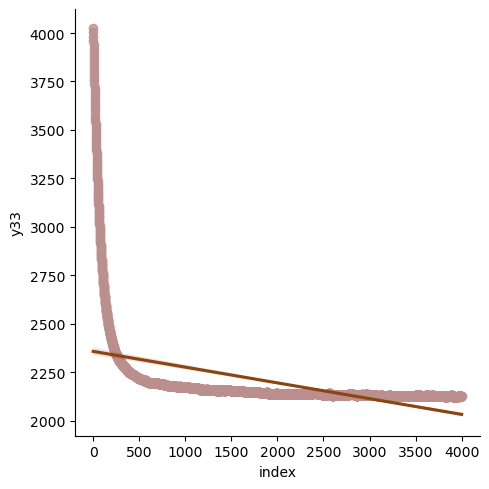

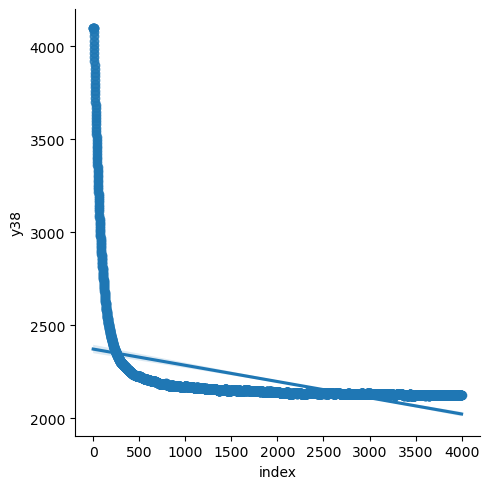

In [65]:
combined_df['index'] = combined_df.index
lm = sns.lmplot(x="index", y="y33", data=combined_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
lm2 = sns.lmplot(x="index", y="y38", data=combined_df, )
plt.show()

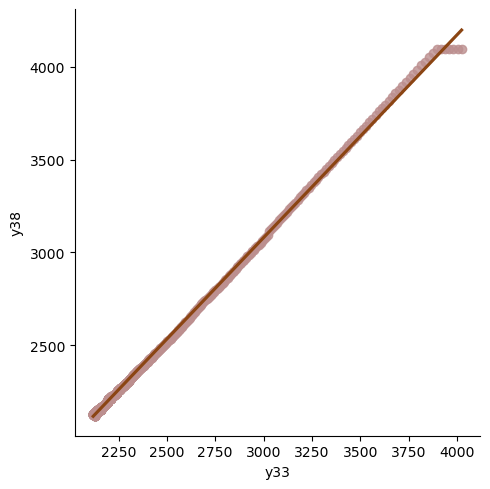

In [54]:
lm = sns.lmplot(x="y33", y="y38", data=combined_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.show()

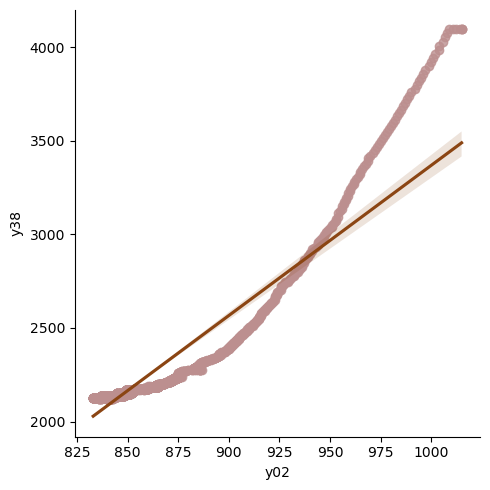

In [67]:
lm = sns.lmplot(x="y02", y="y38", data=combined_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.show()

In [10]:
train_data = combined_df.T

In [11]:
train_data.index = [f'y{i:02}' for i in range(1, 521)]

In [12]:
train_data.iloc[:, :50]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
y01,1072,1072,1070,1067,1065,1063,1061,1059,1057,1055,...,1009,1008,1007,1006,1005,1004,1002,1001,1000,999
y02,1015,1015,1015,1014,1012,1011,1009,1008,1007,1006,...,972,971,970,969,969,968,967,966,965,965
y03,1024,1024,1023,1021,1020,1018,1017,1014,1012,1010,...,970,969,969,968,967,966,965,965,964,963
y04,1116,1115,1113,1111,1108,1106,1103,1101,1098,1096,...,1036,1035,1034,1032,1031,1029,1028,1026,1025,1024
y05,1196,1194,1190,1187,1184,1181,1178,1174,1172,1169,...,1081,1079,1077,1075,1073,1071,1069,1067,1065,1063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
y516,1222,1211,1199,1187,1175,1163,1152,1140,1129,1118,...,829,821,814,806,799,792,785,778,771,764
y517,1849,1830,1809,1790,1770,1750,1731,1712,1692,1673,...,1200,1188,1176,1164,1152,1140,1129,1117,1106,1095
y518,1847,1828,1808,1788,1769,1749,1729,1710,1691,1673,...,1200,1188,1176,1164,1152,1141,1129,1118,1107,1096
y519,1955,1934,1912,1891,1869,1848,1827,1806,1787,1766,...,1260,1247,1234,1221,1208,1196,1184,1172,1160,1148


In [13]:
X= train_data.iloc[:, :50]
y= train_data.iloc[:, 50:]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [14]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
y435,1714,1697,1679,1661,1644,1626,1608,1590,1573,1556,...,1131,1120,1109,1098,1087,1077,1067,1057,1046,1036
y437,1917,1898,1877,1856,1835,1815,1795,1776,1756,1736,...,1251,1238,1226,1213,1202,1190,1178,1167,1155,1143
y209,402,402,399,398,396,393,391,389,387,385,...,332,330,329,328,326,325,323,322,321,319
y333,876,870,863,855,847,840,832,825,818,810,...,633,628,623,619,615,610,606,601,596,592
y221,2932,2901,2868,2837,2806,2775,2745,2714,2684,2656,...,1910,1891,1872,1853,1834,1816,1798,1780,1762,1745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
y72,3228,3204,3179,3154,3129,3104,3080,3057,3034,3010,...,2428,2413,2398,2384,2368,2354,2340,2325,2311,2298
y107,1565,1556,1545,1535,1524,1514,1504,1493,1483,1474,...,1230,1224,1218,1211,1205,1199,1193,1187,1181,1176
y271,2025,2006,1986,1967,1948,1928,1909,1891,1872,1854,...,1395,1383,1371,1359,1347,1336,1325,1314,1303,1292
y436,1175,1165,1153,1142,1131,1120,1109,1098,1087,1076,...,811,804,797,790,784,777,771,765,759,753


In [15]:
y_train

,50,51,52,53,54,55,56,57,58,59,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
y435,1026,1017,1007,997,988,979,970,961,952,943,...,106,106,106,106,106,106,106,106,106,106
y437,1132,1121,1110,1099,1088,1077,1067,1057,1047,1036,...,106,106,106,106,106,106,106,106,106,106
y209,318,317,315,314,313,312,310,309,308,307,...,139,139,139,139,139,139,139,139,139,139
y333,588,583,579,575,571,568,564,560,556,552,...,152,152,152,152,152,152,152,152,152,152
y221,1728,1711,1694,1677,1661,1645,1629,1613,1597,1582,...,271,271,271,271,271,271,271,271,271,271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
y72,2284,2272,2258,2245,2233,2220,2208,2195,2183,2172,...,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085
y107,1170,1164,1158,1152,1147,1142,1136,1131,1125,1120,...,585,585,585,585,585,585,585,585,585,585
y271,1281,1271,1260,1250,1240,1230,1220,1210,1200,1191,...,296,296,296,296,296,296,296,296,296,296
y436,746,740,735,729,723,717,712,707,701,695,...,105,105,105,105,105,105,105,105,105,105


In [39]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors", 5: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [16]:
### Building pipelins of standard scaler and lasso model

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

# List of all the pipelines
pipelines = [pipeline_lasso]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "Lasso"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [17]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

Lasso: 78.714815 


In [18]:
#All training data
for pipe in pipelines:
    pipe.fit(X, y)

In [19]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X,y,scoring="neg_root_mean_squared_error", cv=5)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

Lasso: 104.041321 


# Inference

In [23]:
cd C:\Users\user\Desktop\2024絕緣體初賽\202406初賽

C:\Users\user\Desktop\2024絕緣體初賽\202406初賽


In [24]:
answer = pd.read_csv('answer.csv')
answer.head()

,id,y01,y02,y03,y04,y05,y06,y07,y08,y09,y10
0,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
test = pd.read_csv("testing.csv")
test.head()

,id,y01,y02,y03,y04,y05,y06,y07,y08,y09,y10
0,1,989.0,1010.0,1350.0,4095.0,2125.0,4095.0,1237.0,1082.0,920.0,2337.0
1,2,984.0,1004.0,1340.0,4095.0,2105.0,4095.0,1228.0,1076.0,916.0,2314.0
2,3,977.0,997.0,1328.0,4095.0,2084.0,4095.0,1218.0,1068.0,910.0,2290.0
3,4,971.0,990.0,1317.0,4095.0,2063.0,4095.0,1209.0,1060.0,904.0,2266.0
4,5,964.0,983.0,1306.0,4095.0,2042.0,4095.0,1199.0,1053.0,898.0,2243.0


In [26]:
test = test.T.drop('id', axis=0)
test

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
y01,989.0,984.0,977.0,971.0,964.0,957.0,951.0,944.0,938.0,931.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y02,1010.0,1004.0,997.0,990.0,983.0,976.0,970.0,963.0,956.0,950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y03,1350.0,1340.0,1328.0,1317.0,1306.0,1296.0,1284.0,1274.0,1263.0,1253.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y04,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y05,2125.0,2105.0,2084.0,2063.0,2042.0,2021.0,2001.0,1980.0,1961.0,1941.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y06,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4094.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y07,1237.0,1228.0,1218.0,1209.0,1199.0,1189.0,1179.0,1170.0,1160.0,1151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y08,1082.0,1076.0,1068.0,1060.0,1053.0,1045.0,1037.0,1029.0,1022.0,1014.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y09,920.0,916.0,910.0,904.0,898.0,891.0,886.0,880.0,875.0,869.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y10,2337.0,2314.0,2290.0,2266.0,2243.0,2220.0,2197.0,2160.0,2137.0,2115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
test_data = test.iloc[:, :50]
test_data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
y01,989.0,984.0,977.0,971.0,964.0,957.0,951.0,944.0,938.0,931.0,...,771.0,767.0,763.0,759.0,755.0,751.0,747.0,744.0,740.0,737.0
y02,1010.0,1004.0,997.0,990.0,983.0,976.0,970.0,963.0,956.0,950.0,...,785.0,780.0,776.0,772.0,767.0,764.0,760.0,756.0,752.0,748.0
y03,1350.0,1340.0,1328.0,1317.0,1306.0,1296.0,1284.0,1274.0,1263.0,1253.0,...,991.0,985.0,978.0,971.0,965.0,958.0,951.0,945.0,939.0,932.0
y04,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,...,3294.0,3256.0,3220.0,3184.0,3148.0,3113.0,3078.0,3044.0,3009.0,2976.0
y05,2125.0,2105.0,2084.0,2063.0,2042.0,2021.0,2001.0,1980.0,1961.0,1941.0,...,1450.0,1437.0,1424.0,1412.0,1400.0,1388.0,1376.0,1364.0,1352.0,1341.0
y06,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4094.0,...,2872.0,2840.0,2810.0,2778.0,2748.0,2718.0,2688.0,2660.0,2631.0,2602.0
y07,1237.0,1228.0,1218.0,1209.0,1199.0,1189.0,1179.0,1170.0,1160.0,1151.0,...,921.0,915.0,909.0,903.0,897.0,891.0,886.0,880.0,875.0,869.0
y08,1082.0,1076.0,1068.0,1060.0,1053.0,1045.0,1037.0,1029.0,1022.0,1014.0,...,827.0,822.0,817.0,813.0,808.0,804.0,799.0,794.0,790.0,786.0
y09,920.0,916.0,910.0,904.0,898.0,891.0,886.0,880.0,875.0,869.0,...,728.0,724.0,721.0,717.0,714.0,710.0,707.0,703.0,700.0,697.0
y10,2337.0,2314.0,2290.0,2266.0,2243.0,2220.0,2197.0,2160.0,2137.0,2115.0,...,1563.0,1549.0,1534.0,1520.0,1507.0,1494.0,1480.0,1467.0,1454.0,1441.0


In [28]:
pred = pipeline_lasso.predict(test_data)

In [29]:
prediction = pd.DataFrame(pred)
prediction

,0,1,2,3,4,5,6,7,8,9,...,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949
0,730.868538,727.119844,723.522802,719.923122,716.366591,712.889973,709.423386,705.921443,702.526202,699.209624,...,328.424607,328.425972,328.423403,328.415887,328.416230,328.423176,328.437656,328.425680,328.444651,328.428768
1,742.818612,738.938226,735.214181,731.491357,727.809638,724.211901,720.628169,717.000978,713.489779,710.059321,...,330.204215,330.205633,330.203138,330.195744,330.196161,330.200948,330.215448,330.203396,330.224207,330.208410
2,928.935627,922.854927,916.976080,911.161439,905.374614,899.713988,894.152884,888.391211,882.903216,877.533795,...,334.577597,334.576557,334.568983,334.571449,334.571040,334.568551,334.577409,334.566516,334.590779,334.575118
3,3027.348576,3010.408391,2993.983964,2977.745154,2961.546362,2945.664476,2930.080151,2913.934897,2898.679961,2883.849915,...,720.464077,720.377644,720.456354,720.402890,720.386003,719.893859,719.910841,719.897290,720.379319,720.383966
4,1340.078345,1328.860787,1317.943962,1307.243583,1296.541138,1286.063702,1275.887094,1265.106780,1254.970030,1245.041034,...,309.107244,309.100209,309.080017,309.106477,309.103738,309.079006,309.075855,309.067811,309.103260,309.087335
5,2626.749908,2605.197885,2584.192962,2563.633707,2543.036301,2522.858214,2503.286995,2482.203270,2462.441931,2443.151890,...,192.942690,192.924071,192.869180,192.963324,192.951721,192.788741,192.762374,192.760721,192.894412,192.881127
6,865.068608,859.693809,854.506291,849.363092,844.251818,839.253063,834.327295,829.248992,824.394218,819.645459,...,333.753071,333.753766,333.747155,333.747088,333.747063,333.749234,333.759891,333.748666,333.769474,333.753721
7,780.842715,776.479557,772.281577,768.099170,763.955425,759.904187,755.886520,751.785384,747.837706,743.979489,...,326.855658,326.856531,326.852607,326.847670,326.847927,326.851748,326.864906,326.853170,326.873954,326.858080
8,691.387767,688.056663,684.871231,681.671766,678.516067,675.433356,672.345125,669.247585,666.225043,663.273430,...,328.198386,328.200766,328.198844,328.189651,328.190500,328.200757,328.216127,328.203867,328.220375,328.204426
9,1440.494924,1427.718070,1415.272312,1403.092128,1390.898310,1378.960080,1367.388197,1355.081044,1343.535801,1332.223501,...,297.674927,297.666485,297.642489,297.675530,297.672413,297.642351,297.635819,297.628473,297.666382,297.650157


In [30]:
final_prediction = prediction.T

In [31]:
final_prediction.to_csv('prediction_lasso0708.csv',index=False)

In [32]:
testing_df = pd.read_csv(r"C:\Users\user\Desktop\2024絕緣體初賽\202406初賽\testing.csv")
testing_df.head()

,id,y01,y02,y03,y04,y05,y06,y07,y08,y09,y10
0,1,989.0,1010.0,1350.0,4095.0,2125.0,4095.0,1237.0,1082.0,920.0,2337.0
1,2,984.0,1004.0,1340.0,4095.0,2105.0,4095.0,1228.0,1076.0,916.0,2314.0
2,3,977.0,997.0,1328.0,4095.0,2084.0,4095.0,1218.0,1068.0,910.0,2290.0
3,4,971.0,990.0,1317.0,4095.0,2063.0,4095.0,1209.0,1060.0,904.0,2266.0
4,5,964.0,983.0,1306.0,4095.0,2042.0,4095.0,1199.0,1053.0,898.0,2243.0


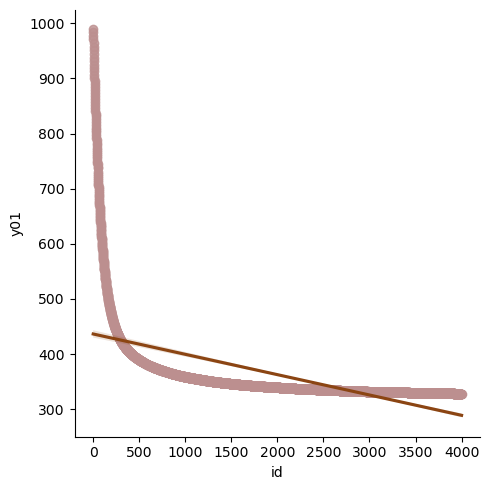

In [33]:
lm = sns.lmplot(x="id", y="y01", data=testing_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.show()

# ABCD-section

In [10]:
# 1234 folder a-b-c-d-section
import pandas as pd
import os

# 資料夾路徑
folder_path = r'C:\Users\user\Desktop\2024絕緣體初賽\202406初賽\training'

# 創建一個空的DataFrame來存儲所有資料
a_df = pd.DataFrame()
b_df = pd.DataFrame()
c_df = pd.DataFrame()
d_df = pd.DataFrame()
# 讀取資料夾中的所有檔案
for i in range(1,14):
    fold = os.path.join(folder_path, str(i))
    for filename in os.listdir(fold):
        if filename.startswith('a'):  # 確保只讀取csv檔案
            file_path = os.path.join(fold, filename)
            # 讀取csv檔案
            df = pd.read_csv(file_path)
            # 移除'id'欄位
            df.drop(columns='id', inplace=True, errors='ignore')
            # 將其添加到combined_df中
            a_df = pd.concat([a_df, df], axis=1)
        if filename.startswith('b'):  # 確保只讀取csv檔案
            file_path = os.path.join(fold, filename)
            # 讀取csv檔案
            df = pd.read_csv(file_path)
            # 移除'id'欄位
            df.drop(columns='id', inplace=True, errors='ignore')
            # 將其添加到combined_df中
            b_df = pd.concat([b_df, df], axis=1)
        if filename.startswith('c'):  # 確保只讀取csv檔案
            file_path = os.path.join(fold, filename)
            # 讀取csv檔案
            df = pd.read_csv(file_path)
            # 移除'id'欄位
            df.drop(columns='id', inplace=True, errors='ignore')
            # 將其添加到combined_df中
            c_df = pd.concat([c_df, df], axis=1)
        if filename.startswith('d'):  # 確保只讀取csv檔案
            file_path = os.path.join(fold, filename)
            # 讀取csv檔案
            df = pd.read_csv(file_path)
            # 移除'id'欄位
            df.drop(columns='id', inplace=True, errors='ignore')
            # 將其添加到combined_df中
            d_df = pd.concat([d_df, df], axis=1)
            
a_df = a_df.T
b_df = b_df.T
c_df = c_df.T
d_df = d_df.T

a_df['label']=0
b_df['label']=1
c_df['label']=2
d_df['label']=3

combined_df = pd.DataFrame()
combined_df = pd.concat([a_df, b_df], axis=0)
combined_df = pd.concat([combined_df, c_df], axis=0)
combined_df = pd.concat([combined_df, d_df], axis=0)
# 印出combined_df的前幾行來確認資料是否正確整合
print(combined_df.head())

        0     1     2     3     4     5     6     7     8     9  ...  3991  \
y01  1072  1072  1070  1067  1065  1063  1061  1059  1057  1055  ...   836   
y02  1015  1015  1015  1014  1012  1011  1009  1008  1007  1006  ...   840   
y03  1024  1024  1023  1021  1020  1018  1017  1014  1012  1010  ...   843   
y04  1116  1115  1113  1111  1108  1106  1103  1101  1098  1096  ...   839   
y05  1196  1194  1190  1187  1184  1181  1178  1174  1172  1169  ...   839   

     3992  3993  3994  3995  3996  3997  3998  3999  label  
y01   836   836   836   836   836   836   836   836      0  
y02   840   840   840   840   840   840   840   840      0  
y03   843   843   843   843   843   843   843   843      0  
y04   839   839   839   839   839   839   839   839      0  
y05   839   839   839   840   840   840   840   841      0  

[5 rows x 4001 columns]


In [11]:
train_data = combined_df
train_data.index = [f'y{i:02}' for i in range(1, 521)]

X= train_data.iloc[:, :50]
y= train_data.label
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42, stratify = train_data.label)

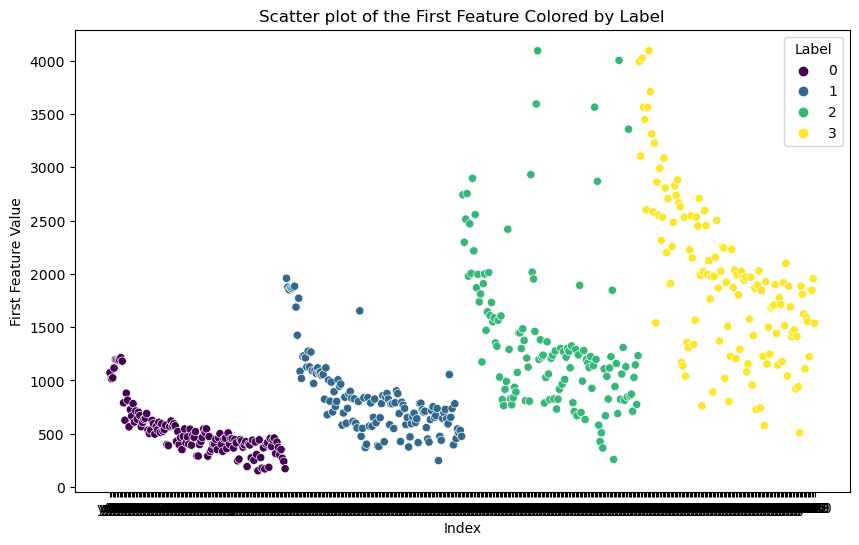

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

first_feature_values = X.iloc[:, 0]

# 創建DataFrame以便於可視化
visual_df = pd.DataFrame({'FirstFeature': first_feature_values, 'Label': y})

# 繪製圖表
plt.figure(figsize=(10, 6))
sns.scatterplot(x=visual_df.index, y='FirstFeature', hue='Label', data=visual_df, palette='viridis')

plt.title('Scatter plot of the First Feature Colored by Label')
plt.xlabel('Index')
plt.ylabel('First Feature Value')
plt.legend(title='Label')
plt.show()

In [12]:
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# 建立pipeline
pipeline_xgb = Pipeline([("scalar", StandardScaler()), ("xgb", XGBClassifier())])
pipeline_rf = Pipeline([("scalar", StandardScaler()), ("rf", RandomForestClassifier())])
pipeline_catboost = Pipeline([("scalar", StandardScaler()), ("catboost", CatBoostClassifier(verbose=0))])

# 創建pipeline列表
pipelines = [pipeline_xgb, pipeline_rf, pipeline_catboost]

# 創建pipeline字典以便參考
pipeline_dict = {0: "XGBClassifier", 1: "RandomForestClassifier", 2: "CatBoostClassifier"}

# 訓練pipeline
for i, pipe in enumerate(pipelines):
    print(f"Training {pipeline_dict[i]}...")
    pipe.fit(X_train, y_train)

# 預測和評估
for i, pipe in enumerate(pipelines):
    print(f"Evaluating {pipeline_dict[i]}...")
    y_pred = pipe.predict(X_test)
    print(f"{pipeline_dict[i]} Accuracy: ", accuracy_score(y_test, y_pred))
    print(f"{pipeline_dict[i]} Classification Report:\n", classification_report(y_test, y_pred))

Training XGBClassifier...
Training RandomForestClassifier...
Training CatBoostClassifier...
Evaluating XGBClassifier...
XGBClassifier Accuracy:  0.6057692307692307
XGBClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.69      0.71        26
           1       0.58      0.73      0.64        26
           2       0.45      0.38      0.42        26
           3       0.67      0.62      0.64        26

    accuracy                           0.61       104
   macro avg       0.60      0.61      0.60       104
weighted avg       0.60      0.61      0.60       104

Evaluating RandomForestClassifier...
RandomForestClassifier Accuracy:  0.6538461538461539
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.88      0.77        26
           1       0.70      0.62      0.65        26
           2       0.52      0.50      0.51        26
         

# Clustering

In [139]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import os

In [159]:
# 假設數據已經加載到DataFrame中，命名為df
# 1234 folder abcd.csv

# 資料夾路徑
folder_path = r'C:\Users\user\Desktop\2024絕緣體初賽\202406初賽\training_original'

# 創建一個空的DataFrame來存儲所有資料
combined_df = pd.DataFrame()

# 讀取資料夾中的所有檔案
for i in range(1,14):
    fold = os.path.join(folder_path, str(i))
    for filename in os.listdir(fold):
        if filename.endswith('.csv'):  # 確保只讀取csv檔案
            file_path = os.path.join(fold, filename)
            # 讀取csv檔案
            df = pd.read_csv(file_path)
            # 移除'id'欄位
            df.drop(columns='id', inplace=True, errors='ignore')
            # 將其添加到combined_df中
            combined_df = pd.concat([combined_df, df], axis=1)

# 印出combined_df的前幾行來確認資料是否正確整合
print(combined_df.head())

    y01   y02   y03   y04   y05   y06   y07   y08   y09   y10  ...   y01  \
0  1072  1015  1024  1116  1196  1194  1190  1196  1214  1181  ...  1809   
1  1072  1015  1024  1115  1194  1193  1189  1194  1212  1180  ...  1791   
2  1070  1015  1023  1113  1190  1189  1185  1192  1209  1177  ...  1771   
3  1067  1014  1021  1111  1187  1186  1182  1188  1205  1174  ...  1751   
4  1065  1012  1020  1108  1184  1183  1179  1185  1202  1170  ...  1731   

    y02   y03   y04   y05   y06   y07   y08   y09   y10  
0  1623  1108  1592  1555  1222  1849  1847  1955  1536  
1  1607  1099  1576  1540  1211  1830  1828  1934  1521  
2  1589  1088  1559  1523  1199  1809  1808  1912  1504  
3  1572  1077  1542  1507  1187  1790  1788  1891  1487  
4  1555  1066  1526  1491  1175  1770  1769  1869  1471  

[5 rows x 520 columns]


In [160]:
train_data = combined_df.T
train_data.index = [f'y{i:02}' for i in range(1, 521)]
# 分離特徵和標籤
X = train_data.iloc[:, :50]  # 前50個數值作為特徵
y = train_data.iloc[:, 50:]  # 後3950個數值作為標籤

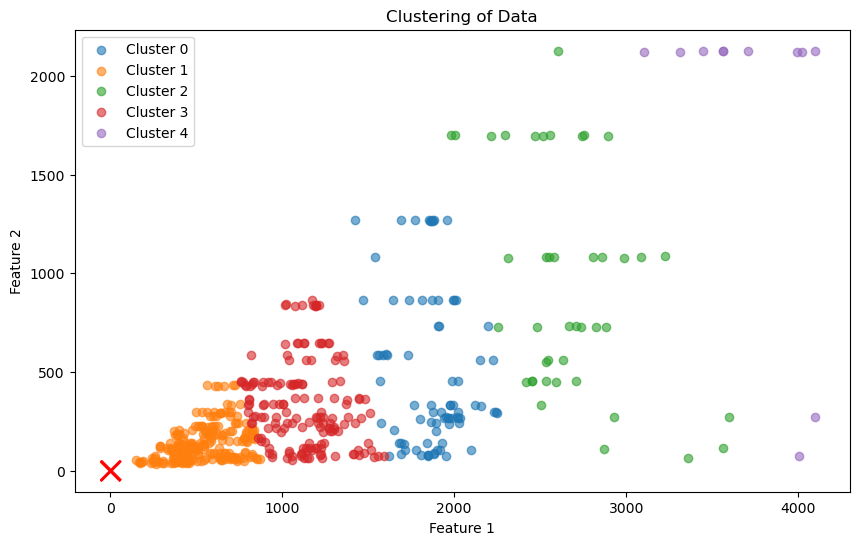

In [161]:
# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans假設選擇3個聚類
kmeans = KMeans(n_clusters=5, random_state=42, max_iter=1000)
clusters = kmeans.fit_predict(X_scaled)

# GMM
# gmm = GaussianMixture(n_components=5, random_state=42)
# clusters = gmm.fit_predict(X_scaled)

# 層次聚類
# hierarchical = AgglomerativeClustering(n_clusters=5)
# clusters = hierarchical.fit_predict(X_scaled)

# DBSCAN
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# clusters = dbscan.fit_predict(X_scaled)

# 將聚類結果添加到原始數據中
train_data['Cluster'] = clusters

# 可視化聚類結果
plt.figure(figsize=(10, 6))

# 定義顏色映射
cmap = plt.get_cmap('viridis')

# 創建散點圖，假設我們要可視化第一個和第二個特徵
for cluster in np.unique(clusters):
    cluster_data = train_data[train_data['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 3999], label=f'Cluster {cluster}', alpha=0.6, marker='o')


# 添加聚類中心
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')

plt.title('Clustering of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [144]:
# 對Test.csv也進行clustering
test = pd.read_csv(r"C:\Users\user\Desktop\2024絕緣體初賽\202406初賽\testing.csv")
test = test.T.drop('id', axis=0)
test_data = test.iloc[:, :50]
test_data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
y01,989.0,984.0,977.0,971.0,964.0,957.0,951.0,944.0,938.0,931.0,...,771.0,767.0,763.0,759.0,755.0,751.0,747.0,744.0,740.0,737.0
y02,1010.0,1004.0,997.0,990.0,983.0,976.0,970.0,963.0,956.0,950.0,...,785.0,780.0,776.0,772.0,767.0,764.0,760.0,756.0,752.0,748.0
y03,1350.0,1340.0,1328.0,1317.0,1306.0,1296.0,1284.0,1274.0,1263.0,1253.0,...,991.0,985.0,978.0,971.0,965.0,958.0,951.0,945.0,939.0,932.0
y04,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,...,3294.0,3256.0,3220.0,3184.0,3148.0,3113.0,3078.0,3044.0,3009.0,2976.0
y05,2125.0,2105.0,2084.0,2063.0,2042.0,2021.0,2001.0,1980.0,1961.0,1941.0,...,1450.0,1437.0,1424.0,1412.0,1400.0,1388.0,1376.0,1364.0,1352.0,1341.0
y06,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4094.0,...,2872.0,2840.0,2810.0,2778.0,2748.0,2718.0,2688.0,2660.0,2631.0,2602.0
y07,1237.0,1228.0,1218.0,1209.0,1199.0,1189.0,1179.0,1170.0,1160.0,1151.0,...,921.0,915.0,909.0,903.0,897.0,891.0,886.0,880.0,875.0,869.0
y08,1082.0,1076.0,1068.0,1060.0,1053.0,1045.0,1037.0,1029.0,1022.0,1014.0,...,827.0,822.0,817.0,813.0,808.0,804.0,799.0,794.0,790.0,786.0
y09,920.0,916.0,910.0,904.0,898.0,891.0,886.0,880.0,875.0,869.0,...,728.0,724.0,721.0,717.0,714.0,710.0,707.0,703.0,700.0,697.0
y10,2337.0,2314.0,2290.0,2266.0,2243.0,2220.0,2197.0,2160.0,2137.0,2115.0,...,1563.0,1549.0,1534.0,1520.0,1507.0,1494.0,1480.0,1467.0,1454.0,1441.0


In [145]:
# 處理數據進行clustering
X_infer = test_data.iloc[:, :50] 

X_infer_scaled = scaler.transform(X_infer)

# cluster inference

# kmeans
infer_clusters = kmeans.predict(X_infer_scaled)
# gmm
# infer_clusters = gmm.predict(X_infer_scaled)
# hierarchical
# infer_clusters = hierarchical.fit_predict(X_infer_scaled)
# dbscan
# infer_clusters = dbscan.predict(X_infer_scaled)

# 將聚類結果添加到原始數據中
test_data['Cluster'] = infer_clusters
print(infer_clusters)

[1 1 1 3 0 3 1 1 1 0]


In [146]:
# 根據cluster訓練3個regression model

# 假設數據已經加載到DataFrame中，命名為df
# df = pd.read_csv('data.csv')  # 或其他數據加載方式

# 分離特徵和標籤
X_train = train_data.iloc[:, :50]  # 前50個數值作為特徵
y_train = train_data.iloc[:, 50:4000]  # 後3950個數值作為標籤

# 聚類結果
train_clusters = train_data['Cluster']
test_clusters = test_data['Cluster']

# 建立和訓練不同聚類的回歸模型
cluster_models = {}
unique_clusters = np.unique(test_clusters)

for cluster in unique_clusters:
    print(f"Training model for cluster {cluster}...")
    # 分離該聚類的數據
    X_train_cluster = X_train[train_clusters == cluster]
    y_train_cluster = y_train[train_clusters == cluster]
    
    # 建立pipeline
    pipeline_lasso = Pipeline([("scalar", StandardScaler()),
                               ("lasso", Lasso())])
    
    # 訓練模型
    pipeline_lasso.fit(X_train_cluster, y_train_cluster)
    
    # 保存模型
    cluster_models[cluster] = pipeline_lasso

    # 交叉驗證
    cv_score = cross_val_score(pipeline_lasso, X_train_cluster, y_train_cluster, scoring="neg_root_mean_squared_error", cv=5)
    print(f"Cluster {cluster} - Lasso RMSE: {-1 * cv_score.mean()}")


Training model for cluster 0...
Cluster 0 - Lasso RMSE: 21.443798077456453
Training model for cluster 1...
Cluster 1 - Lasso RMSE: 33.286817954720135
Training model for cluster 3...
Cluster 3 - Lasso RMSE: 2.8564255927800044


In [147]:
# 分離測試數據的特徵
X_test = test_data.iloc[:, :50]

prediction = pd.DataFrame()
for i in range(len(X_test)):
    cluster = test_clusters.iloc[i]
    model = cluster_models[cluster]
    pred = model.predict(X_test.iloc[i].values.reshape(1, -1))
    prediction = pd.concat([prediction, pd.DataFrame(pred)],axis=0)
final_prediction = prediction.T

In [148]:
# 將predictions作為最終預測結果
final_prediction.to_csv('prediction_clustering5_RemoveNoise_lasso0719.csv',index=False)
prediction

,0,1,2,3,4,5,6,7,8,9,...,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949
0,732.474822,728.643120,724.984891,721.376284,717.714329,714.291450,710.833984,707.481531,704.037169,700.711163,...,321.530293,321.527066,321.529884,321.502411,321.529189,321.503663,321.494116,321.509361,321.512738,321.477491
0,743.985296,740.019940,736.246857,732.518976,728.733776,725.189516,721.618868,718.157364,714.607405,711.177646,...,323.555084,323.553090,323.554864,323.528292,323.554298,323.531892,323.521587,323.537529,323.540155,323.506099
0,927.549887,921.531262,915.855878,910.133417,904.383816,898.818010,893.189558,887.724934,882.102711,876.836572,...,318.007069,318.024250,318.007543,317.983333,318.013281,318.046726,318.027008,318.068513,318.063043,318.056624
0,3383.459867,3368.450062,3357.092458,3342.068757,3326.587443,3318.314983,3306.617999,3291.130134,3273.985748,3262.710087,...,2125.444444,2125.333333,2125.444444,2125.444444,2125.444444,2125.444444,2125.444444,2125.444444,2125.444444,2125.444444
0,1331.565745,1320.540363,1309.620509,1298.837899,1288.207032,1277.654888,1267.211746,1255.207103,1245.253048,1235.181480,...,293.131561,293.156831,293.102866,293.144087,293.106214,293.094581,293.082541,293.070968,293.110474,293.072309
0,3246.310145,3232.164707,3218.252811,3210.047001,3198.096755,3185.882006,3177.702278,3167.362192,3156.345229,3146.459556,...,2125.444444,2125.333333,2125.444444,2125.444444,2125.444444,2125.444444,2125.444444,2125.444444,2125.444444,2125.444444
0,864.554969,859.187828,854.118749,849.036512,843.914294,838.994109,834.020201,829.195999,824.243121,819.557159,...,315.803784,315.813143,315.803528,315.778683,315.807000,315.821081,315.804746,315.837113,315.834137,315.819463
0,781.269473,776.845787,772.649660,768.480267,764.262608,760.267490,756.216638,752.294351,748.272019,744.413296,...,317.401946,317.403606,317.401905,317.375230,317.403280,317.391757,317.380281,317.401854,317.403094,317.375430
0,692.757993,689.299046,685.995235,682.764902,679.467085,676.422178,673.342739,670.366182,667.321762,664.328614,...,318.444793,318.437701,318.444618,318.416376,318.442505,318.404588,318.398465,318.408246,318.414521,318.372903
0,1430.200966,1417.663319,1405.286365,1393.074059,1380.925788,1368.865951,1356.932229,1343.019826,1331.728455,1320.225984,...,277.826316,277.864580,277.774635,277.807181,277.765632,277.753122,277.716688,277.730693,277.764711,277.707427


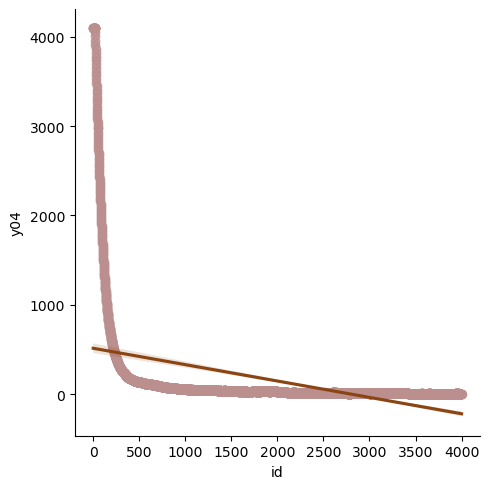

In [164]:
result_df = pd.read_csv(r"C:\Users\user\Desktop\2024絕緣體初賽\202406初賽\testing_clustering_lasso0709.csv")
result_df.head()

lm = sns.lmplot(x="id", y="y04", data=result_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.show()